# Outliers

Outliers are unusual values in your dataset, and they can distort statistical analyses and violate their assumptions. Unfortunately, all analysts will confront outliers and be forced to make decisions about what to do with them. Given the problems they can cause, you might think that it’s best to remove them from your data. But, that’s not always the case. Removing outliers is legitimate only for specific reasons.

**Outliers can be very informative about the subject-area and data collection process. It’s essential to understand how outliers occur and whether they might happen again as a normal part of the process or study area.** Unfortunately, resisting the temptation to remove outliers inappropriately can be difficult. Outliers increase the variability in your data, which decreases statistical power. Consequently, excluding outliers can cause your results to become statistically significant.

## Methods of Detecting and Removing Outliers
1. **Graphing Your Data to Identify Outliers** (Univariate and Multivariate graphical analysis i.e Box Plot, Histogram, Scatterplot etc.)
2. **Interquartile Method**
3. **Z-scores to Detect Outliers**
4. **Modified Z-Score**
4. **Finding Outliers with Hypothesis Tests**
5. **KNN**
6. **Local Outlier Factor**
7. **Isolation Forest**
8. **KMeans**
1. **DBSCAN**
2. **Bayesian Networks**
3. **Neural networks**
4. **LSTM networks**
5. **Hidden Markov models**
6. **Support vector machines**
7. **Fuzzy logic based outlier detection**
8. **Elliptic Envelope**
9. **Time series anomaly detection**


### 1. Graphing Your Data to Identify Outliers
The simplest way to detect an outlier is by graphing the features or the data points. Visualization is one of the best and easiest ways to have an inference about the overall data and the outliers. Scatter plots and box plots are the most preferred visualization tools to detect outliers.

Outliers can be univariate or multivariate.

**Ø Univariate outliers** are generally referred to as extreme points on a variable. For eg: 10000 in above example.

**Ø Multivariate outliers** are generally combination of unusual data points for two or more variables. Scatter plots are mostly used in multivariate settings which indicate the relationship between the response variable and one or more predictor variables. Sometimes an outlier may fall within the expected range of response variable (x-axis) and the predictor variable (y-axis) but can still be an outlier as it does not fit the model i.e. it does not fit the regression line of the model. Contrary to univariate outliers, multivariate may not necessarily be extreme data points.

**Note:-** We can always draw the graphical representation of data after proper understanding specially in the case of multivariate outliers.


### Univariate Outlier Graphical Analysis

In [2]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
# load iris dataset
iris = datasets.load_iris()
# Since this is a bunch, create a dataframe
df=pd.DataFrame(iris.data)
df['class']=iris.target
df['class'] = df['class'].replace([0,1,2],['setosa', 'versicolor', 'virginica'])
df.rename(columns = {0:'sepal_length',
  1:'sepal_width',
  2:'petal_length',
  3:'petal_width',},inplace=True)

In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [4]:
import sklearn
from sklearn.datasets import load_diabetes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

<AxesSubplot: xlabel='sepal_width', ylabel='class'>

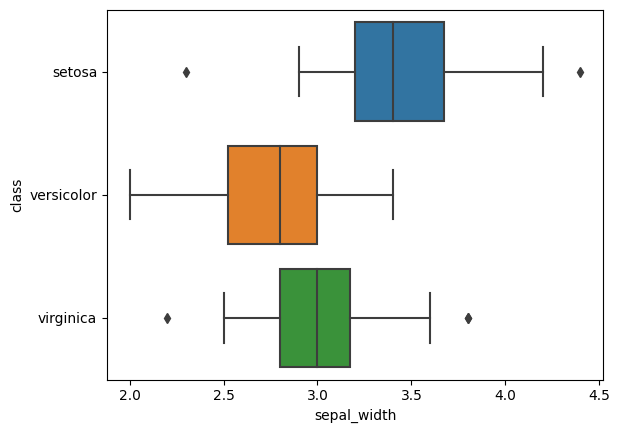

In [5]:
sns.boxplot(x = df['sepal_width'],y=  df['class'])

<AxesSubplot: xlabel='sepal_width', ylabel='Count'>

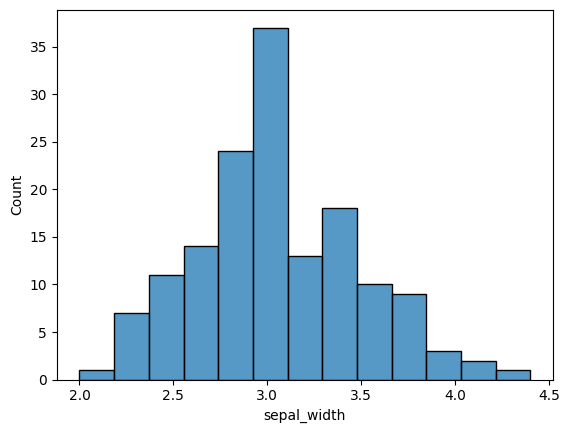

In [6]:
sns.histplot(df['sepal_width'])

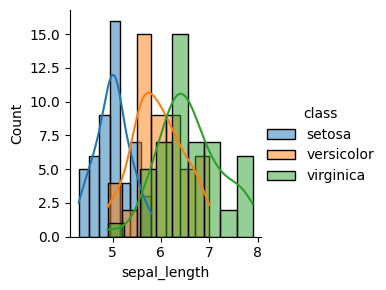

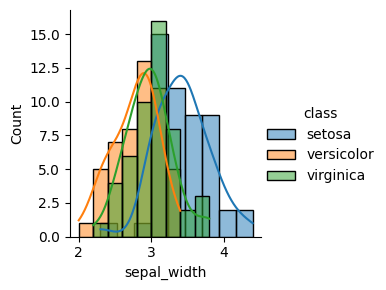

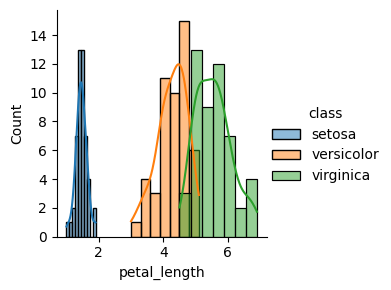

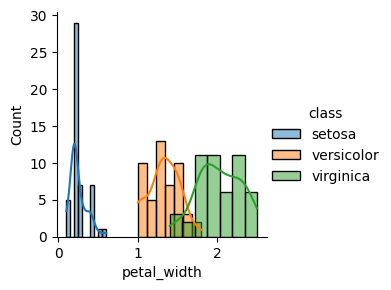

In [7]:
plot = sns.FacetGrid(df, hue="class")
plot.map(sns.histplot, "sepal_length",kde=True).add_legend()
 
plot = sns.FacetGrid(df, hue="class")
plot.map(sns.histplot, "sepal_width",kde=True).add_legend()
 
plot = sns.FacetGrid(df, hue="class")
plot.map(sns.histplot, "petal_length",kde=True).add_legend()
 
plot = sns.FacetGrid(df, hue="class")
plot.map(sns.histplot, "petal_width",kde=True).add_legend()
 
plt.show()

<AxesSubplot: xlabel='class', ylabel='sepal_width'>

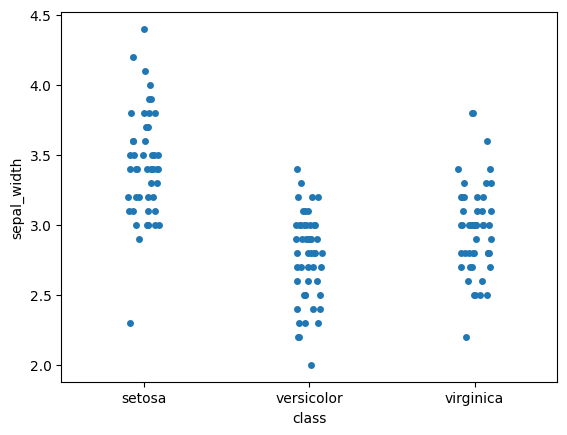

In [8]:
sns.stripplot(y=df['sepal_width'],x=  df['class'])

<AxesSubplot: ylabel='sepal_width'>

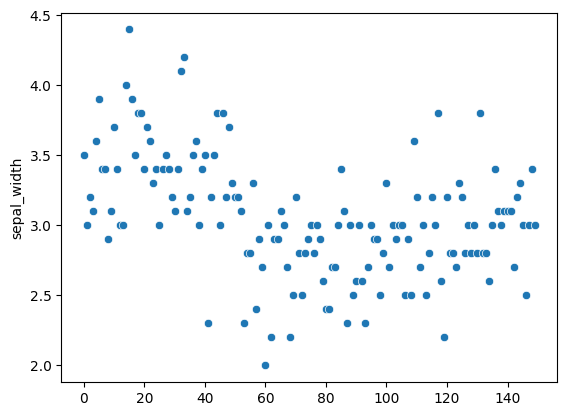

In [9]:
sns.scatterplot(x=df.index,y=df['sepal_width'])

### Multivariate Outlier Graphical Analysis

<AxesSubplot: xlabel='sepal_length', ylabel='sepal_width'>

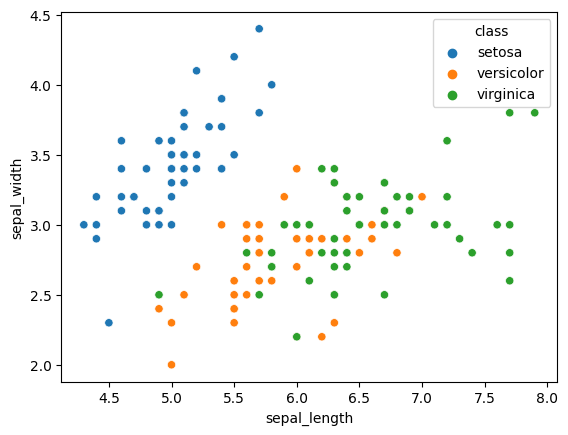

In [10]:
sns.scatterplot(x = df['sepal_length'], y = df['sepal_width'],hue = df['class'])

## Interquartile Range Method

In [11]:
# Load the dataset
diabetics = load_diabetes()
 
# Create the dataframe
column_name = diabetics.feature_names
df_diabetics = pd.DataFrame(diabetics.data)
df_diabetics.columns = column_name
df_diabetics.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


<AxesSubplot: >

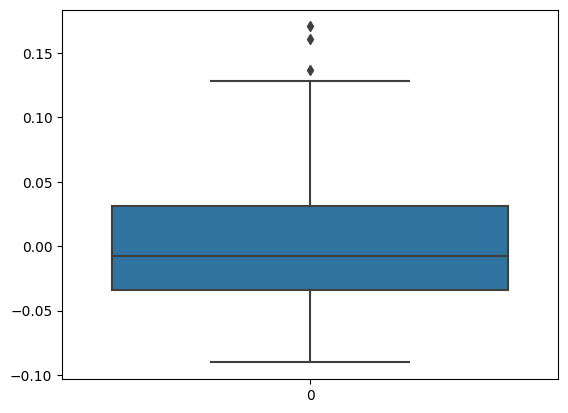

In [12]:
sns.boxplot(df_diabetics['bmi'])

In [13]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
print("Old Shape: ", df_diabetics.shape)
Q1 = df_diabetics['bmi'].quantile(0.25)
Q3 = df_diabetics['bmi'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
# Create arrays of Boolean values indicating the outlier rows

upper_array = np.where(df_diabetics['bmi']>=upper)[0]
lower_array = np.where(df_diabetics['bmi']<=lower)[0]

# Removing the outliers
if(len(upper_array)!=0):
    df_diabetics.drop(index=upper_array, inplace=True)
    df_diabetics.reset_index(drop=True,inplace=True)
if(len(lower_array)!=0):
    df_diabetics.drop(index=lower_array, inplace=True)
    df_diabetics.reset_index(drop=True,inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df_diabetics.shape)

Old Shape:  (442, 10)
New Shape:  (439, 10)


<AxesSubplot: >

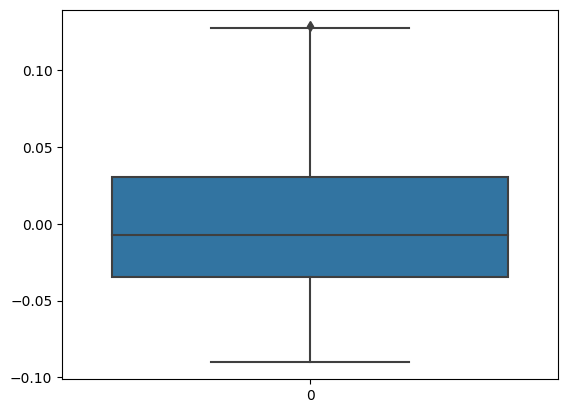

In [14]:
sns.boxplot(df_diabetics['bmi'])

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore
from sklearn.datasets import fetch_california_housing

cali_houses = fetch_california_housing()

X = cali_houses.data
column_names = cali_houses.feature_names
y = cali_houses.target

df = pd.DataFrame(data=X, columns=column_names)

display(df)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


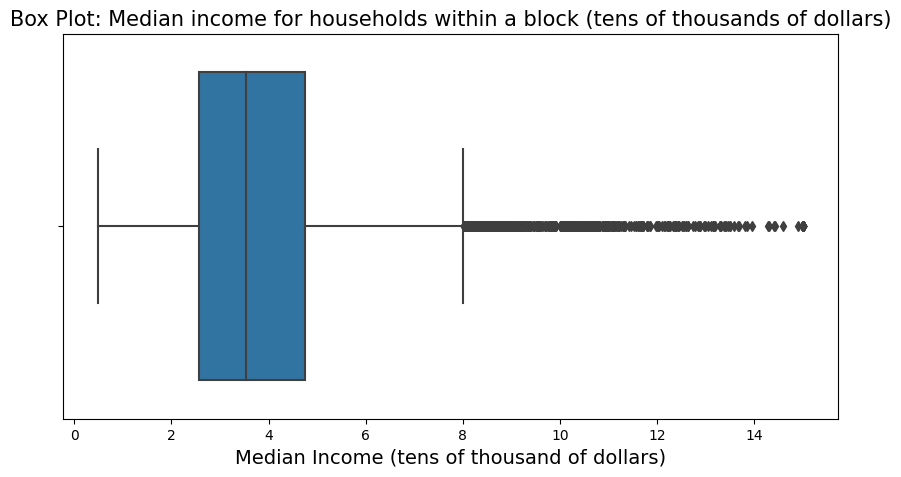

In [16]:

fig = plt.figure(figsize=(10,5))
sns.boxplot(x=df.MedInc)
plt.title('Box Plot: Median income for households within a block (tens of thousands of dollars)', fontsize=15)
plt.xlabel('Median Income (tens of thousand of dollars)', fontsize=14)
plt.show()

In [17]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
curr_rows = df.shape[0]
exec_rows = 0
i = 1
while(curr_rows!=exec_rows): ### we are using while loop here to iterate again and again on the dataset to remove all the outliers.
    curr_rows = exec_rows
    print("Iteration Number: ",i)
    print("Old Shape: ", df.shape)
    Q1 = df['MedInc'].quantile(0.25)
    Q3 = df['MedInc'].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    # Create arrays of Boolean values indicating the outlier rows

    upper_array = np.where(df['MedInc']>=upper)[0]
    lower_array = np.where(df['MedInc']<=lower)[0]

    # Removing the outliers
    if(len(upper_array)!=0):
        df.drop(index=upper_array, inplace=True)
        df.reset_index(drop=True,inplace=True)
    if(len(lower_array)!=0):
        df.drop(index=lower_array, inplace=True)
        df.reset_index(drop=True,inplace=True)

    # Print the new shape of the DataFrame
    print("New Shape: ", df.shape)
    exec_rows = df.shape[0]
    i = i + 1

Iteration Number:  1
Old Shape:  (20640, 8)
New Shape:  (19959, 8)
Iteration Number:  2
Old Shape:  (19959, 8)
New Shape:  (19795, 8)
Iteration Number:  3
Old Shape:  (19795, 8)
New Shape:  (19761, 8)
Iteration Number:  4
Old Shape:  (19761, 8)
New Shape:  (19753, 8)
Iteration Number:  5
Old Shape:  (19753, 8)
New Shape:  (19752, 8)
Iteration Number:  6
Old Shape:  (19752, 8)
New Shape:  (19749, 8)
Iteration Number:  7
Old Shape:  (19749, 8)
New Shape:  (19748, 8)
Iteration Number:  8
Old Shape:  (19748, 8)
New Shape:  (19748, 8)


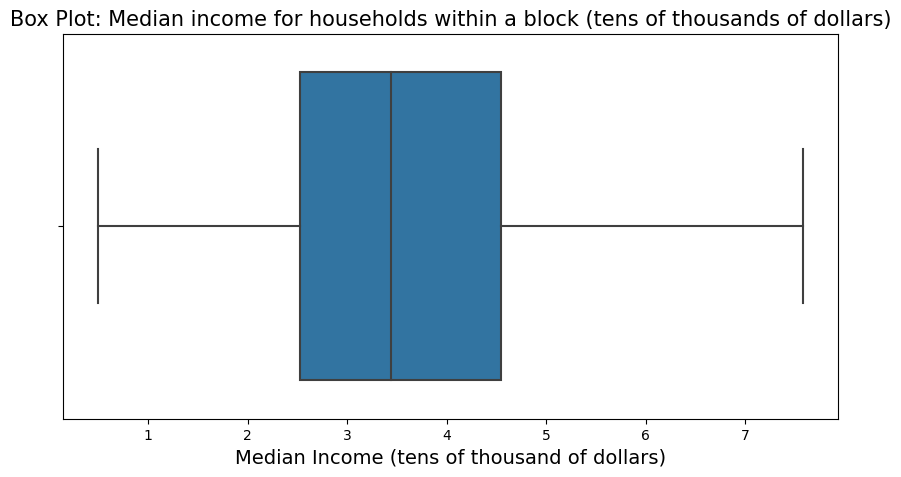

In [18]:

fig = plt.figure(figsize=(10,5))
sns.boxplot(x=df.MedInc)
plt.title('Box Plot: Median income for households within a block (tens of thousands of dollars)', fontsize=15)
plt.xlabel('Median Income (tens of thousand of dollars)', fontsize=14)
plt.show()

### Z-scores to Detect Outliers

In [19]:
diabetics = load_diabetes()
 
# Create the dataframe
column_name = diabetics.feature_names
df_diabetics = pd.DataFrame(diabetics.data)
df_diabetics.columns = column_name
df_diabetics.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [20]:
df = df_diabetics
m = np.mean(df['bmi'])
s = np.std(df['bmi'])
df['Z-score_bmi'] = (df['bmi'] - m)/s

<AxesSubplot: xlabel='Z-score_bmi', ylabel='Count'>

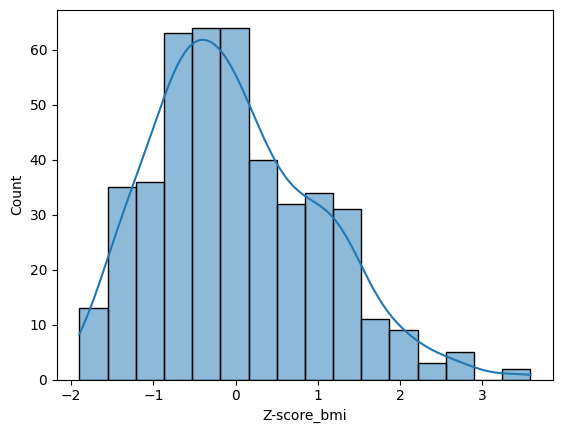

In [21]:
sns.histplot(data = df_diabetics , x = 'Z-score_bmi', kde = True)

<AxesSubplot: >

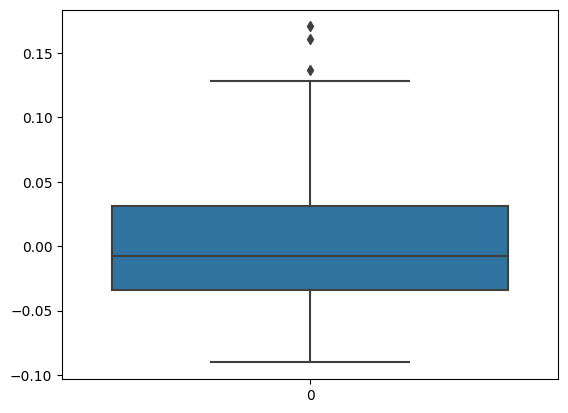

In [22]:
sns.boxplot(df_diabetics['bmi'])

In [23]:
## Removal Of Outliers 
print("Old Shape: ", df.shape)
upper_array = np.where(df['Z-score_bmi']>2.5)[0]
lower_array = np.where(df['Z-score_bmi']<-2.5)[0]
# Removing the outliers
if(len(upper_array)!=0):
    df.drop(index=upper_array, inplace=True)
    df.reset_index(drop=True,inplace=True)
if(len(lower_array)!=0):
    df.drop(index=lower_array, inplace=True)
    df.reset_index(drop=True,inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df.shape)

Old Shape:  (442, 11)
New Shape:  (435, 11)


<AxesSubplot: xlabel='Z-score_bmi', ylabel='Count'>

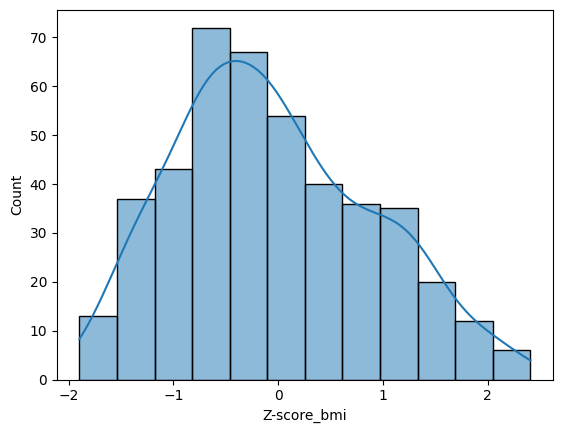

In [24]:
sns.histplot(data = df_diabetics , x = 'Z-score_bmi', kde = True)

<AxesSubplot: >

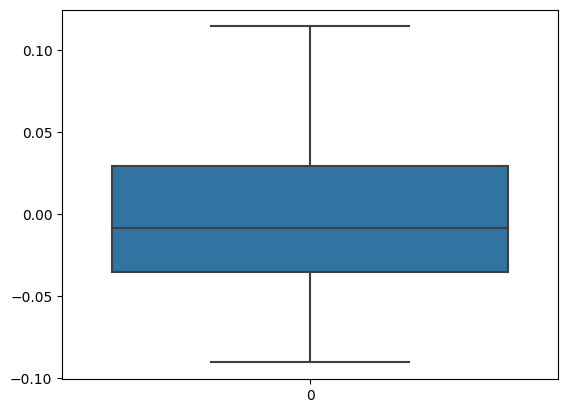

In [25]:
sns.boxplot(df_diabetics['bmi'])

In [59]:
## Testing on California Housing Data

cali_houses = fetch_california_housing()

X = cali_houses.data
column_names = cali_houses.feature_names
y = cali_houses.target

df_housing = pd.DataFrame(data=X, columns=column_names)

In [60]:
df = df_housing
m = np.mean(df['MedInc'])
s = np.std(df['MedInc'])
df['Z-score_MedInc'] = (df['MedInc'] - m)/s

<AxesSubplot: xlabel='Z-score_MedInc', ylabel='Count'>

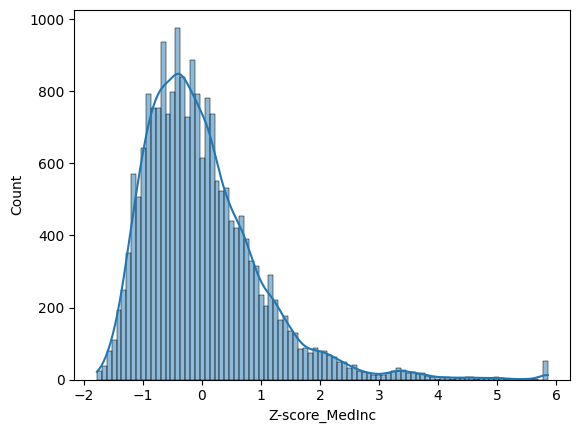

In [61]:
sns.histplot(data = df , x = 'Z-score_MedInc', kde = True)

<AxesSubplot: >

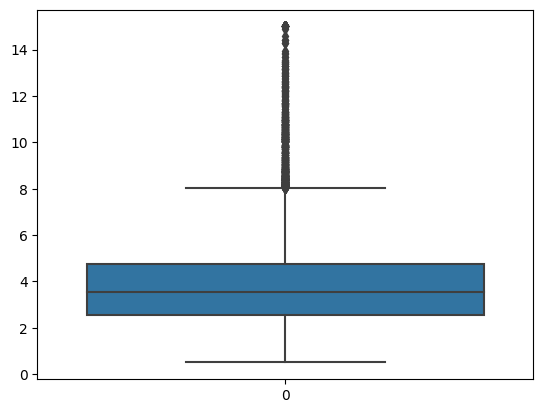

In [62]:
sns.boxplot(df['MedInc'])

In [63]:
## Removal Of Outliers 
print("Old Shape: ", df.shape)
upper_array = np.where(df['Z-score_MedInc']>1.9)[0]
lower_array = np.where(df['Z-score_MedInc']<-1.9)[0]
# Removing the outliers
if(len(upper_array)!=0):
    df.drop(index=upper_array, inplace=True)
    df.reset_index(drop=True,inplace=True)
if(len(lower_array)!=0):
    df.drop(index=lower_array, inplace=True)
    df.reset_index(drop=True,inplace=True)

# Print the new shape of the DataFrame
print("New Shape: ", df.shape)

Old Shape:  (20640, 9)
New Shape:  (19682, 9)


<AxesSubplot: xlabel='Z-score_MedInc', ylabel='Count'>

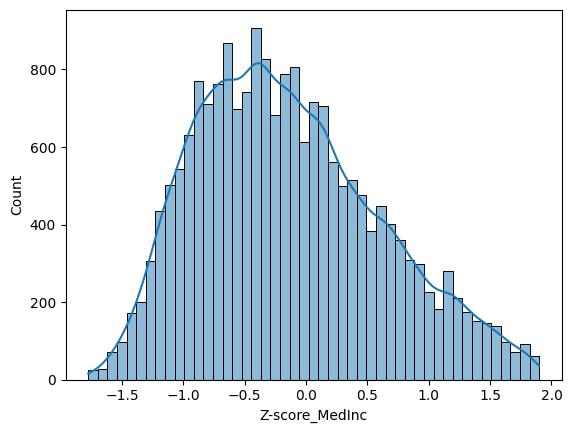

In [64]:
sns.histplot(data = df , x = 'Z-score_MedInc', kde = True)

<AxesSubplot: xlabel='MedInc'>

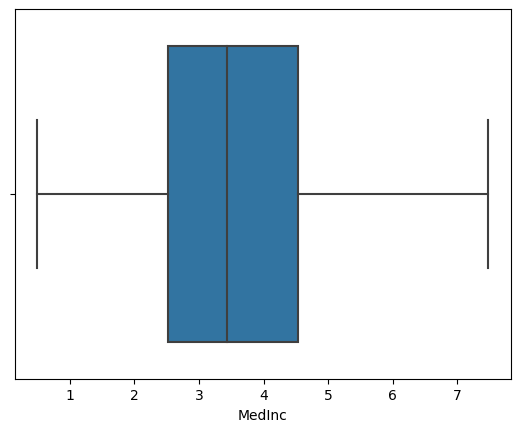

In [65]:
sns.boxplot(x = df['MedInc'])